In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
%matplotlib inline 

In [2]:
import glob
def textfile(d):
    files = glob.glob(d)
    return files
textfile1=textfile("./test/*.txt")
textfile2=textfile("./test2/*.txt")

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Ken\AppData\Local\Temp\jieba.cache
Loading model cost 1.299 seconds.
Prefix dict has been built succesfully.


In [12]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '採用',
 '如下',
 '個體',
 '五年',
 '相關',
 '六年',
 '部分',
 '企業',
 '之',
 '於',
 '註',
 '係',
 '民國',
 '至',
 '千元',
 '資產',
 '三十一日',
 '期',
 '負債',
 '年',
 '價值',
 '按',
 '有',
 '年報',
 '十二月',
 '本集團',
 '期間',
 '計',
 '所',
 '集團',
 '人',
 '其',
 '合',
 '併',
 '報導',
 '等',
 '已',
 '時',
 '新',
 '明',
 '續',
 '該',
 '日',
 '外',
 '報告',
 '股',
 '財務',
 '除',
 '附',
 '附錄',
 '予',
 '者',
 '第',
 '另',
 '年度',
 '本',
 '○',
 '臺',
 '一',
 '幣',
 '後',
 '大同',
 '及',
 '與',
 '公司',
 '單位',
 '報表',
 '公',
 '司',
 '為',
 '月',
 '有限公司',
 '以',
 '或',
 '其他',
 '金額',
 '臺幣',
 '認列',
 '衡量']

In [33]:
puncs = '！？｡/＂＃＄$％＆＇()\n（）( , )＊＋，_－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》.%「」『』【】 〔〕〖〗〘〙〚〛-〜,〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [37]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.
def wordlist(textfile):
    corpus = []
    jieba.load_userdict('dict.txt')
    for t in textfile:
        f = open(t,'r', encoding ="utf-8")
        r = f.read()
        remove_digits = str.maketrans('', '', digits)
        r = r.translate(remove_digits)
        r_list = jieba.cut(r, cut_all=False)
        r_list = list(r_list)
        for i in range(5):
            for w in r_list:
                if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                    r_list.remove(w)        
        st=" ".join(r_list)
    #     corpus[st]
        corpus.append(st)
    return corpus

In [38]:
w1=wordlist(textfile1)
w2=wordlist(textfile2)

In [39]:
w1

['事件 內容 增資案 惹議 市場 派 提告 因現 金 增資 消息 曝光 股價 重挫 蒸發 億 市值 已經 損及 股東 權益 市場 派 股東 在 台北 地檢署 告發 再 重申 董事 會 決議 是 在 額定 股本 內 原 股東 的 現金 增資 從 未 涉入 股市 股價 是否 遭人為 操縱 無 從 得知 至於 日前 針對 股票 價格 波動 過度 劇烈 情事 依規定 自日 起 降低 融資 比率 一成 提高 融券 保證 金一成 市場 派 欣同 發聲明 指出 董事 會 通過 包括 每股 面額 元 辦理 現金 增資 億股 項 決議 表面 上 完成 增資 將可 改善 結構 強化 競爭力 但 億 股現 增案 雖 表示 發行 價格 暫時 未定 市場 消息 傳出 預定 將以 元 辦理 現增 由 市價 仍 元 導致 消息 一出 隔日 起 股價 連續 重挫 最低 點來 到 元',
 '高院 判 林蔚山 需賠 億 最高院 發回 重審 投保 中心 控訴 董事 長 林蔚山 造成 損失 應予 賠償 台灣 高等法院 原判 決 林蔚山 共需 賠償 億元 但 最高 法院 廢棄 高院 的 原判 決 並發 回 重新 審理 最高法院 判決 理由 有項 尚志 資產給 通達 的 貸款 尚餘 萬未 清償 何以 持股 比例 計算 因此 所受 損害 萬 原審 並未 說明 理由 林蔚山 行為 無 造成 到 各 投資損 失達 億餘元 高院 未 調查 徒以 尚志 投資 以元 投資 通達 借貸 尚志 投資 尚志 投資 借貸 通達 的 款項 就認 定 損害 不無可議 高院 原 認定 尚志 投資 以元 投資 取得 通達 的 股份 不是 故 不 承受 該公 司損失 也 不是 受 損害 的 計算 基礎 若 果真如此 尚志 投資元 投資 通達 的 行為 是否 致 受 損害 尚非 無 疑 有關 增資 股款 溢價 發行 新股 股款 匯入 尚志 投資 原 審 逕 認 是 借 貸 違反 公司法 第條 第一 項規定 違背 的 忠 實及 注意 義務 不無認 作主 張事實 的 違法 通達 董事 會 決議 停業 如何 償 還銀行 款項 經與 銀行 溝通 及律 師建議 避免 影響 債信 由 原本 就是 連 保人 的 尚志 投資代償 原審 未加 審究 遽認 尚志 投資上 開行 是 林蔚山 指示 而 不利 的 判斷 並有 可議 高等法院 就 董事 長 因違 

In [16]:
w=w1+w2
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(w)
words = vectorizer.get_feature_names()
X = tfidf.toarray()
X_std = StandardScaler().fit_transform(X)
sklearn_pca = sklearnPCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [17]:
Y_sklearn

array([[ -1.96472851, -11.19950659],
       [ 27.03029648,   9.47883574],
       [  1.72912846,  -3.39025425],
       [ -0.64181413,  -1.98738356],
       [-14.33427854,  22.83764864],
       [ -2.32946324,  -8.07304257],
       [ -4.52962862,  -7.20848738],
       [ -4.9595119 ,  -0.45781004]])

In [18]:
len(w1)

5

In [19]:
len(w2)

3

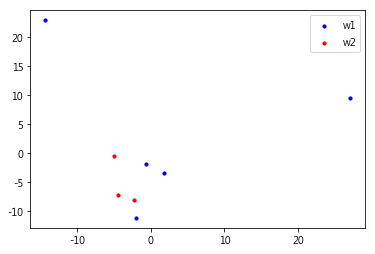

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x = Y_sklearn[:len(w1),0], y = Y_sklearn[:len(w1),1], s=10, c='b', label='w1')
ax1.scatter(x = Y_sklearn[len(w1):,0], y = Y_sklearn[len(w1):,1], s=10, c='r', label='w2')
plt.legend(loc='best');
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)
X_clustered

array([0, 1, 0, 0, 0, 0, 0, 0])

No handles with labels found to put in legend.


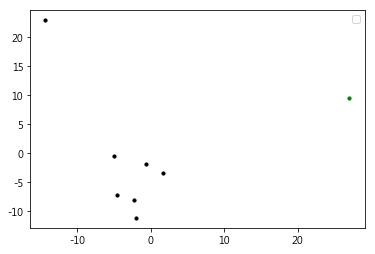

In [22]:
kmeans1position=[i for i,x in enumerate(X_clustered) if x == 0]
kmeans2position=[i for i,x in enumerate(X_clustered) if x == 1]
kmeans1=[]
kmeans2=[]
for i in kmeans1position:
    kmeans1.append(Y_sklearn[i].tolist())
for i in kmeans2position:
    kmeans2.append(Y_sklearn[i].tolist())
kmeans1=np.asarray(kmeans1)
kmeans2=np.asarray(kmeans2)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x = kmeans1[:,0], y = kmeans1[:,1], s=10, c='black')
ax1.scatter(x = kmeans2[:,0], y = kmeans2[:,1], s=10, c='green')
plt.legend(loc='best');
plt.show()

In [23]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='YangChunKai', api_key='KLWEiRRt706XJqTQckad')

In [24]:
pca_data1 = go.Scatter(
        x = Y_sklearn[:len(w1),0],
        y = Y_sklearn[:len(w1),1],
        name = 'pca_data1',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile1
    )

pca_data2 = go.Scatter(
        x = Y_sklearn[len(w1):,0],
        y = Y_sklearn[len(w1):,1],
        name = 'pca_data2',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile2
    )
data = [pca_data1,pca_data2]
py.iplot(data, filename = 'PCA Scatter Chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~YangChunKai/0 or inside your plot.ly account where it is named 'PCA Scatter Chart'


In [25]:
kmeans_data1 = go.Scatter(
        x = kmeans1[:,0],
        y = kmeans1[:,1],
        name = 'kmeans_data1',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile1
    )

kmeans_data2 = go.Scatter(
        x = kmeans2[:,0],
        y = kmeans2[:,1],
        name = 'kmeans_data2',
        mode = "markers",
        hoverinfo = 'text',
        text = textfile2
    )
data = [kmeans_data1,kmeans_data2]
py.iplot(data, filename = 'kmeans Scatter Chart')